<a href="https://colab.research.google.com/github/vitorsr/ccd/blob/master/maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get update -qqq && apt-get dist-upgrade -qqq -y

In [0]:
# https://github.com/googlecolab/colabtools/issues/85#issuecomment-372532728
!apt-get install libproj-dev proj-data proj-bin -qqq -y
!apt-get install libgeos-dev -qqq -y
!pip install -q -U cython
!pip install -q -U cartopy
!pip install -q -U geopandas
!pip install -q -U geoplot

In [0]:
import pandas as pd
import mapclassify
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt

In [3]:
# inmetr_df = pd.read_csv("https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115090&authkey=AHJ7x3UN1MzJW1M")

stations_df = pd.read_csv("https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115089&authkey=AN3WuZnSKh9jgC8")
inmetr_df = pd.read_csv("https://raw.githubusercontent.com/vitorsr/ccd/master/data/baseline_temp2.csv?token=AFPQLZBILR7UOZB72SARAY25XY5US")

inmetr_df.head(1)

,date,id,tair,tmax,tmin,tw
0,08-01,82024,-3.135246,2.330769,-1.4,-1.482883


In [4]:
df = pd.merge(stations_df, inmetr_df, on='id')

df.head(1)

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1,date,tair,tmax,tmin,tw
0,82915,-67.8,-9.966667,160.0,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-01,1.241905,3.297674,0.611111,0.155556


In [0]:
!wget -q "https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_BRA_shp.zip"
!unzip -qq -u gadm36_BRA_shp.zip

In [0]:
br = gpd.read_file('gadm36_BRA_1.shp')

In [0]:
df_sorted = df.sort_values(by=['date'])
df_08 = df_sorted[(df_sorted['date'] >= '08-01') & (df_sorted['date'] <= '08-31')]

In [0]:
lst_08 = [v for k, v in df_08.groupby('date')] # daily list of df_08,
                                               # for all unique values of date
                                               # in the above range (august)

In [9]:
print("List of", type(lst_08[0]), "with length =", len(lst_08))

List of <class 'pandas.core.frame.DataFrame'> with length = 31


In [0]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("png")

%mkdir fig

In [0]:
import numpy as np
import cartopy.crs as ccrs
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

In [0]:
df_i_ = lst_08[0]

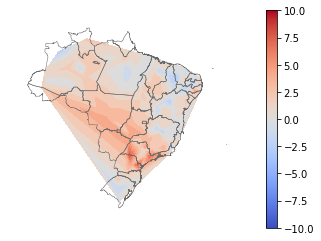

In [58]:
var = "tair"
df_i_ = df_i_[df_i_[var] == df_i_[var]]
lons = df_i_["lon"].to_numpy()[:]
lats = df_i_["lat"].to_numpy()[:]
data = df_i_[var].to_numpy()[:]

fig = plt.figure("Temperatura do ar")
ax = plt.axes(projection=ccrs.Miller())
fig.add_axes(ax)
lb = -10; ub = 10; lv = 20 # lower bound, upper bound,levels
plt.tricontourf(lons, lats, data, np.linspace(lb, ub, lv),
                cmap="coolwarm", extend="both")
gplt.polyplot(br, edgecolor="dimgray", linewidth=0.5, zorder=1, ax=ax)
plt.colorbar(ScalarMappable(norm=Normalize(lb, ub), cmap="coolwarm"), ax=ax)
plt.show()
# plt.savefig("fig/" + str("{:03d}".format(0)) + ".png", dpi=150)

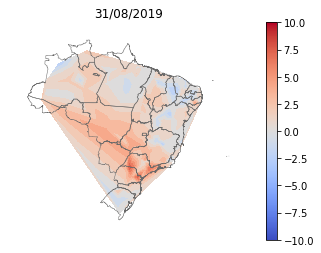

In [59]:
var = "tair"
lb = -10; ub = 10; lv = 20 # lower bound, upper bound, levels

for i, df_i_ in enumerate(lst_08):
  df_i_ = df_i_[df_i_[var] == df_i_[var]]
  lons = df_i_["lon"].to_numpy()[:]
  lats = df_i_["lat"].to_numpy()[:]
  data = df_i_[var].to_numpy()[:]

  plt.close(fig)
  del fig; del ax;
  fig = plt.figure("Temperatura do ar" + str("{:02d}".format(i+1)))
  ax = plt.axes(projection=ccrs.Miller())
  fig.add_axes(ax)
  
  plt.tricontourf(lons, lats, data, np.linspace(lb, ub, lv),
                  cmap="coolwarm", extend="both")
  gplt.polyplot(br, edgecolor="dimgray", linewidth=0.5, zorder=1, ax=ax)
  plt.colorbar(ScalarMappable(norm=Normalize(lb, ub), cmap="coolwarm"), ax=ax)
  ax.set_title(str("{:02d}".format(i+1)) + "/08/2019")
  plt.savefig("fig/" + str("{:03d}".format(i+1)) + ".png", dpi=150)


In [72]:
# !sudo apt install imagemagick ffmpeg
# !convert fig/*.png -alpha off fig/*.png
!ffmpeg -framerate 3 -i 'fig/%03d.png' output.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
# gdf = gpd.GeoDataFrame(
#     df, 
#     geometry=gpd.points_from_xy(df.lon, df.lat))

In [0]:
# gdf_lst = []
# for i,d in enumerate(lst_08):
#   df = lst_08[i]
#   gdf = gpd.GeoDataFrame(
#       df, 
#       geometry=gpd.points_from_xy(df.lon, df.lat))
#   gdf['tair'] = gdf['tair'].round(2)
#   gdf_lst.append(gdf)

In [0]:
# gdf.head(1)

In [0]:
# var = 'tair'
# for i, gd in enumerate(gdf_lst):
#   ax = gplt.voronoi(
#       gd[gd[var] == gd[var]], # Nota: NaN == NaN sempre retorna False!
#       clip=br.simplify(0.1),
#       hue=var, k=10, cmap='Reds', edgecolor='None',
#       legend=True
#   )
#   gplt.polyplot(br, edgecolor='black', zorder=1, ax=ax)
#   ax.set_title("Air Temperature @ 2019/08/" + str(i))
#   plt.savefig(str(i) + '.png')